In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


# 데이터 불러오기
- train 데이터 구조 : (3000,24)
- test 데이터 구조 : (2000,23)

In [6]:
import pandas as pd

train = pd.read_csv("./train.csv")
train = train.drop(columns = ["id"], axis = 1)


test = pd.read_csv("./test.csv")
test = test.drop(columns = ["id"], axis = 1)

submission = pd.read_csv("./sample_submission.csv")

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(train.shape)
train.head()

train set은 23 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.
(3000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [7]:
print(f'test set은 {test.shape[1]} 개의 feature를 가진 {test.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(test.shape)
test.head()

test set은 22 개의 feature를 가진 2000 개의 데이터 샘플로 이루어져 있습니다.
(2000, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


target값 0과 1이 비슷하게 분포하고 있음. 1이 약간 더 많음

In [8]:
train.target.value_counts()

1    1668
0    1332
Name: target, dtype: int64

In [9]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [10]:
print(f"수치형 데이터 컬럼의 개수는 {len(numeric_features)}")
print(f"범주형 데이터 컬럼의 개수는 {len(categorical_features)}")

수치형 데이터 컬럼의 개수는 19
범주형 데이터 컬럼의 개수는 4


# EDA

# 결측치 확인

- train, test 데이터 모두 결측치는 없음

In [11]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col




In [12]:
missing_col = check_missing_col(train)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [13]:
missing_col = check_missing_col(test)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


## 기초통계분석

In [14]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [15]:
# 전체의 데이터 타입 확인
train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

## feature 분포 시각화
전체 변수들을 그래프로 시각화

In [16]:
def numeric_histogram(df) :
    
    plt.style.use("ggplot")

    # 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
    plt.figure(figsize=(25,20))
    
    plt.suptitle("numeric histogram", fontsize=40)

    # id는 제외하고 시각화합니다.
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(5,5,i+1)
        plt.title(cols[i], fontsize=20, color = "black")
        if len(df[cols[i]].unique()) > 20:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

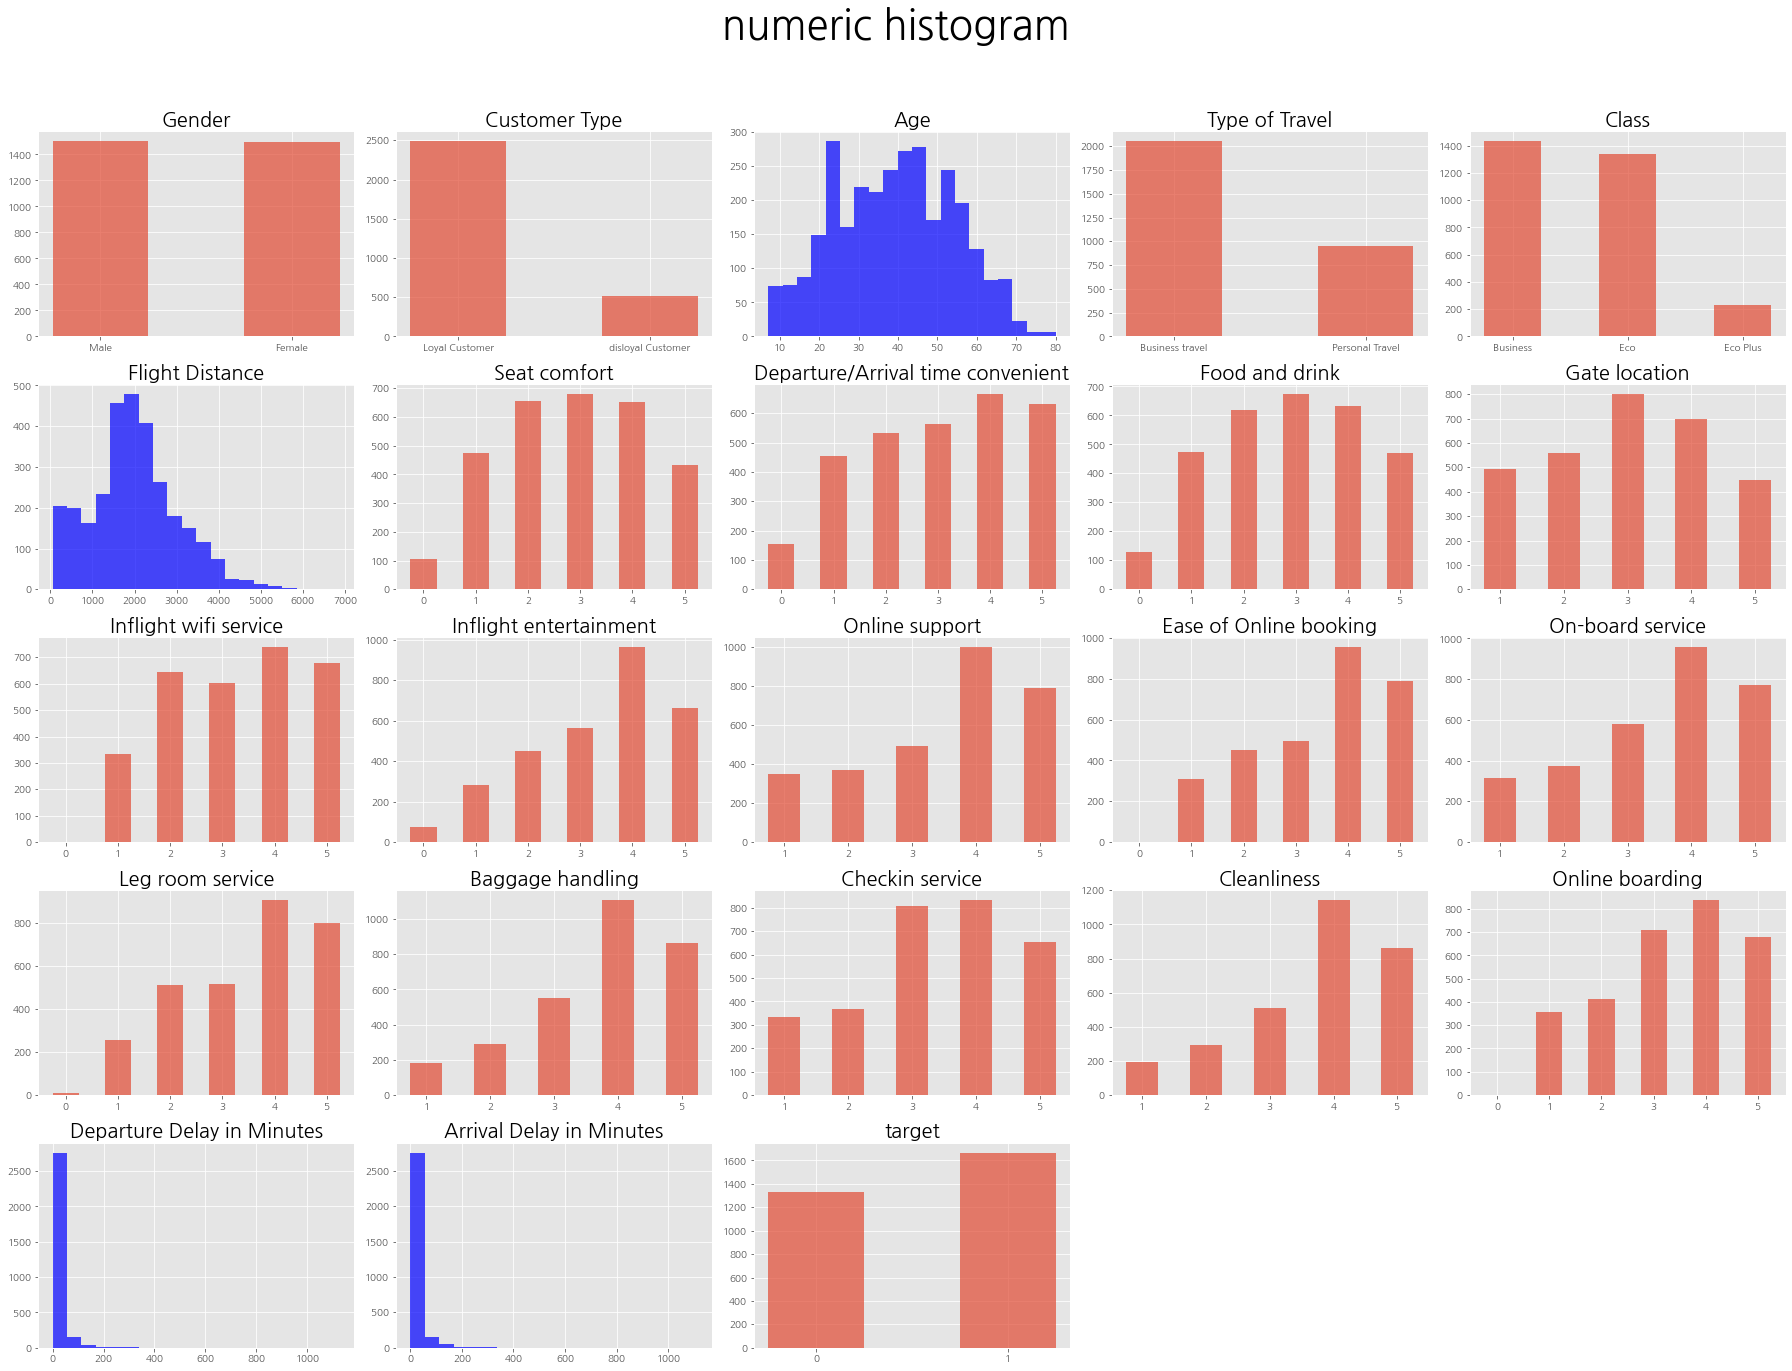

In [17]:
numeric_histogram(train)

Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 는 피처는 연속형 
나머지는 레벨형

Flight Distance(비행거리)는 약간 왼쪽으로 치우쳐있고
Departure Delay in Minutes(출발 지연 시간), Arrival Delay in Minutes(도착 지연 시간)은 왼쪽에 많이 몰려있음. 

In [18]:
def numeric_boxplots(df):
    
    plt.style.use("ggplot")

    feature = numeric_features

    # Boxplot을 이용해서 데이터의 분포 살펴보기

    plt.figure(figsize = (20,15))
    plt.suptitle("수치형데이터 - boxplot", fontsize = 40)

    for i in range(len(feature)) :
        plt.subplot(5,4,i+1)
        plt.title(feature[i], color = "black")
        plt.boxplot(df[feature[i]])
    plt.show()

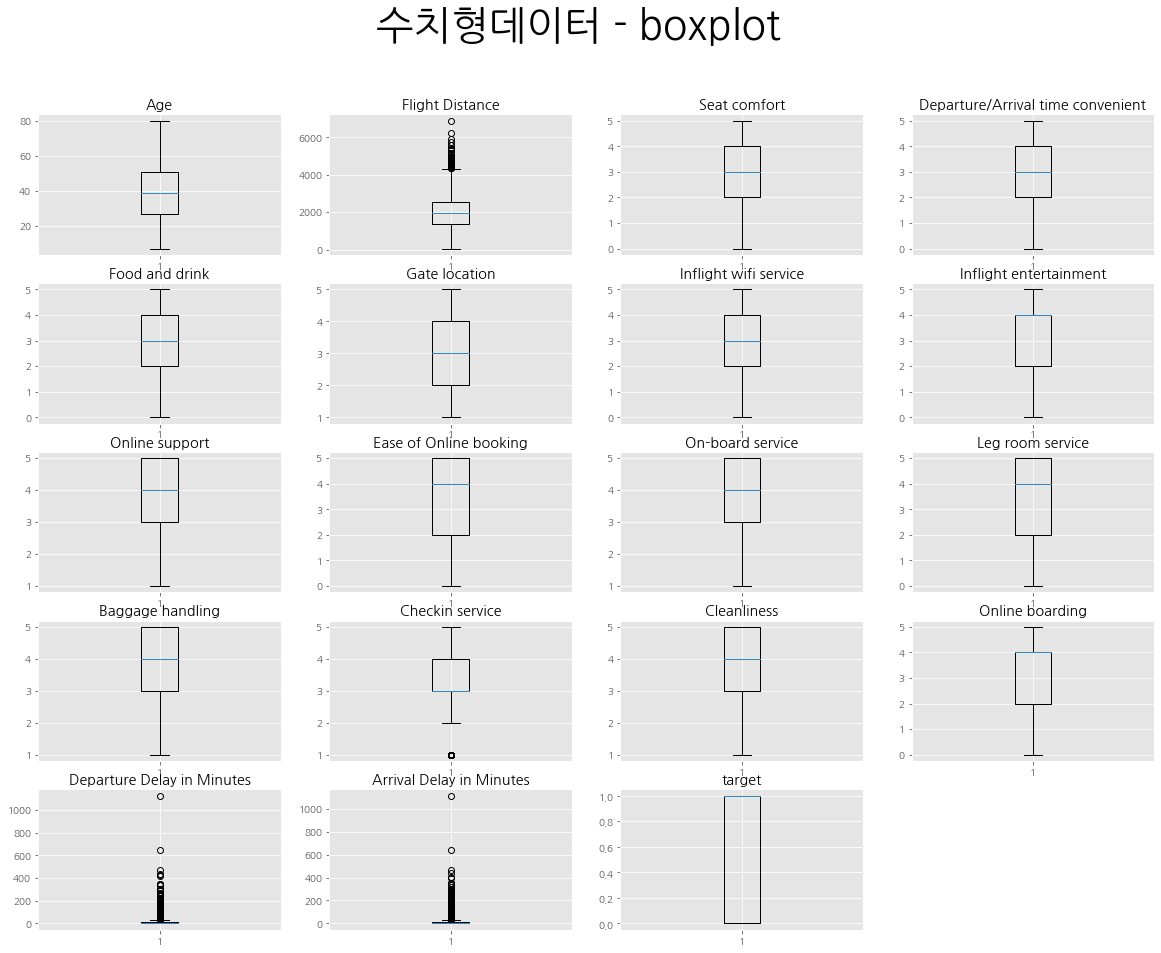

In [19]:
numeric_boxplots(train)

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 피처는 이상치들이 보임

범주형 변수의 카테고리에 따른 target feature의 분포. violine plot

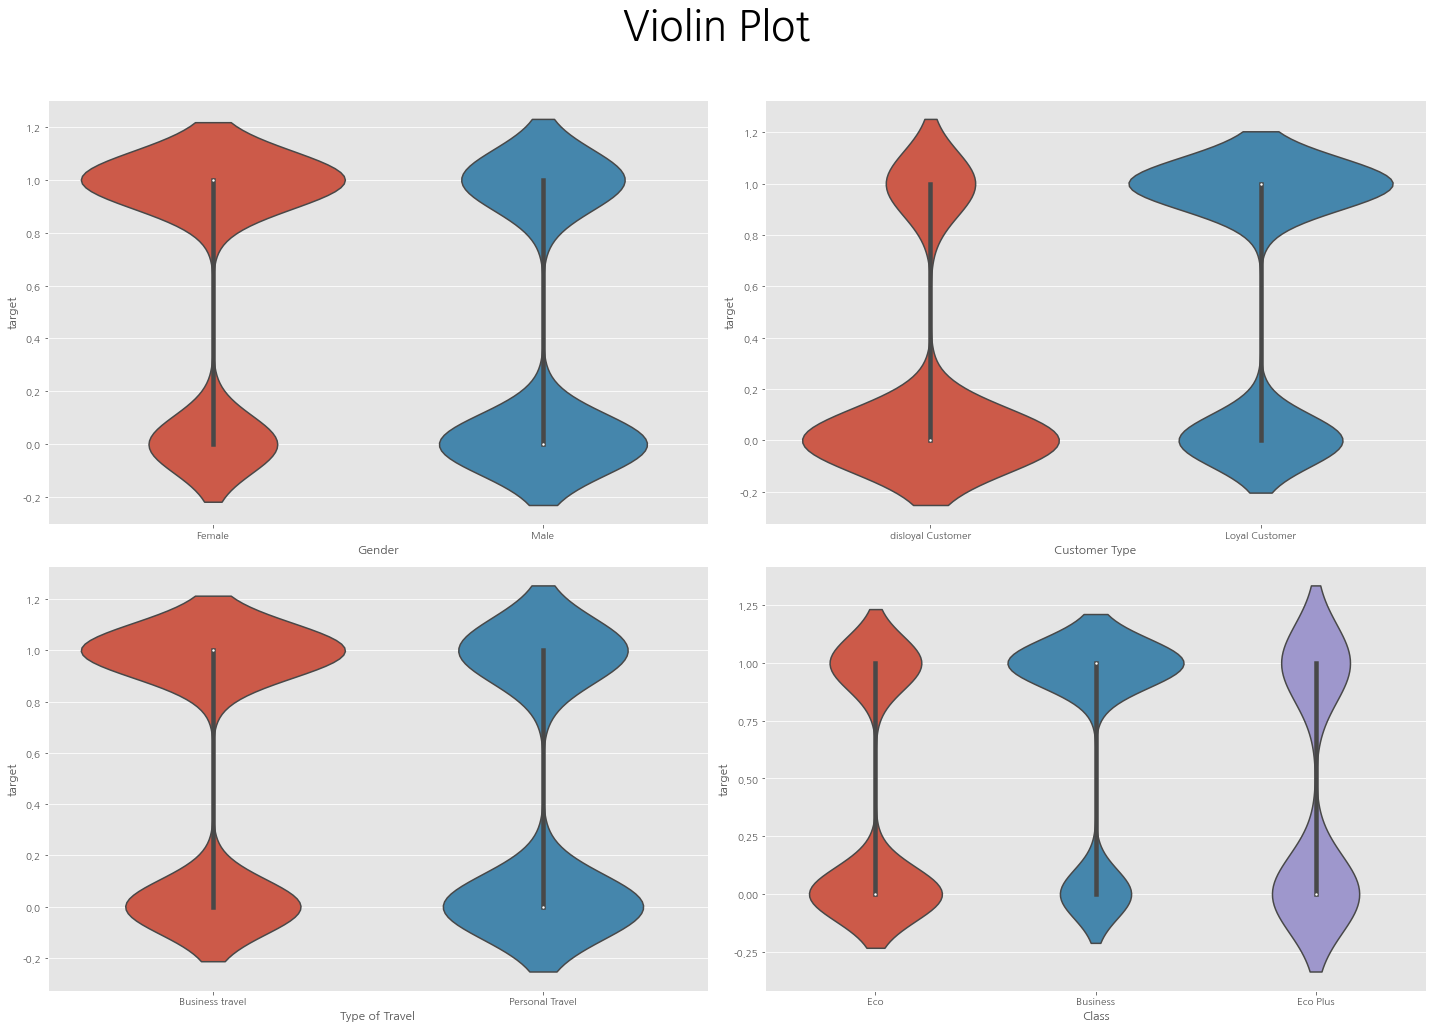

In [20]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
#categorical_features = train.columns[train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_features[i])
    plt.ylabel(target)
    sns.violinplot(x= train[categorical_features[i]], y= train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

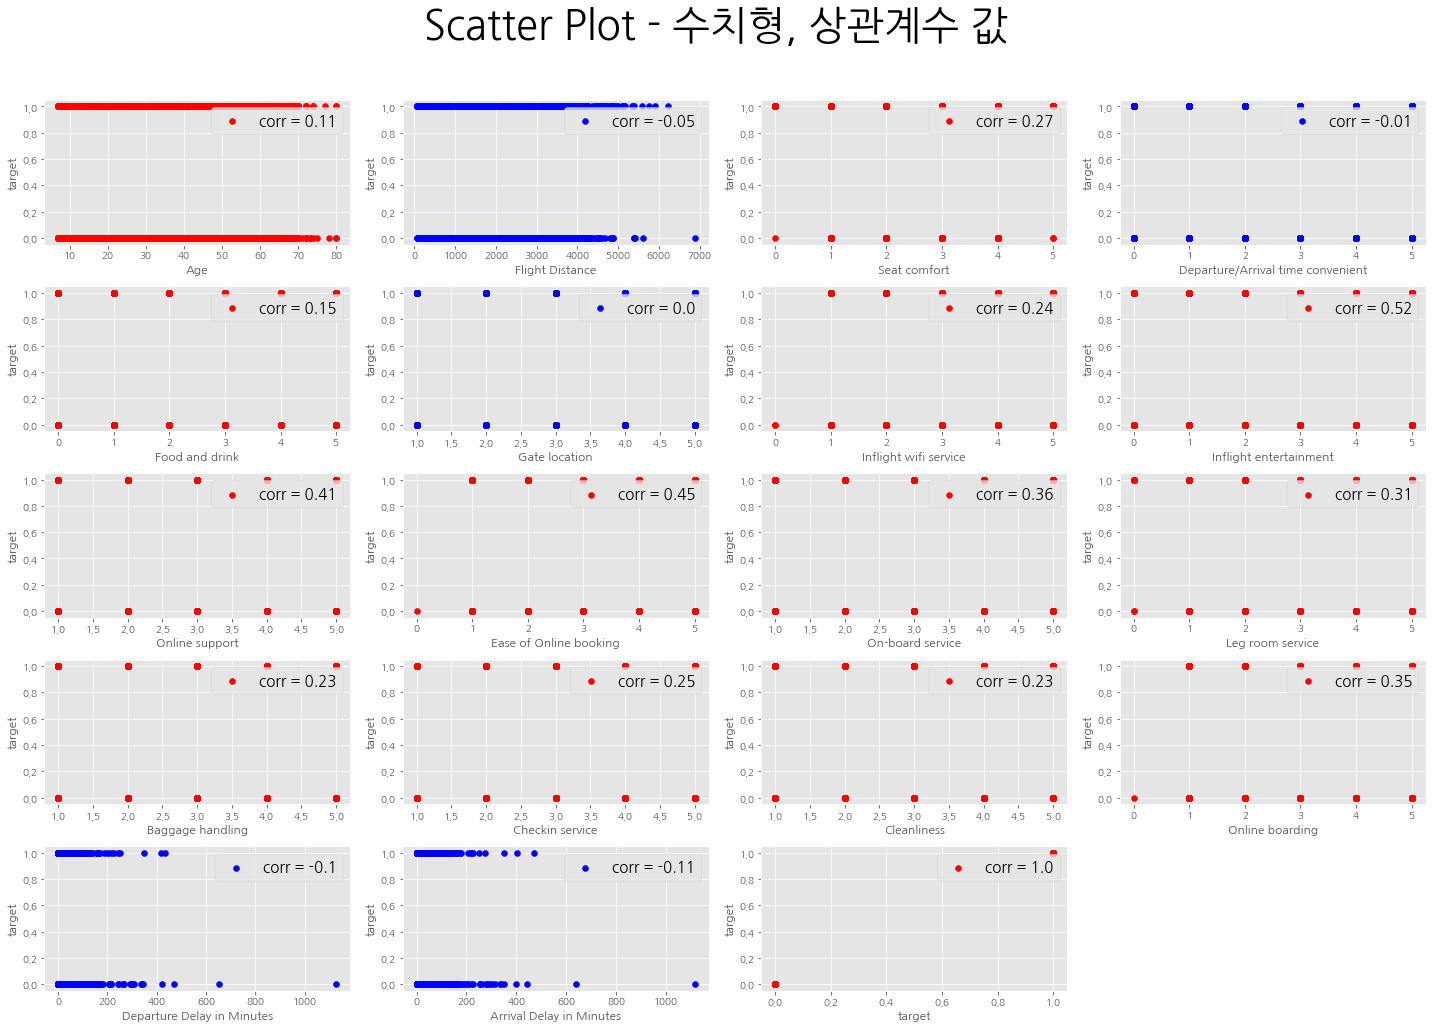

In [37]:
target = "target"

feature = numeric_features

plt.figure(figsize = (20,15))
plt.suptitle("Scatter Plot - 수치형, 상관계수 값",fontsize = 40)

for i in range(len(feature)):
    
    plt.subplot(5,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train[[feature[i],target]].corr().iloc[0,1].round(2)
    
    c = "red" if corr_score > 0 else "blue"
    
    plt.scatter(train[feature[i]], train[target], color = c, label = f"corr = {corr_score}")
    
    #plt.boxplot(train[target], train[feature[i]] )
    plt.legend(fontsize = 15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [34]:
def numeric_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    num_data = df[numeric_features]

    # 박스플롯
    fig, axes = plt.subplots(3, 6, figsize=(35, 30))

    fig.suptitle('feature distributions per quality', fontsize= 40)
    for ax, col in zip(axes.flat, num_data.columns[:-1]):
       

        sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
        ax.set_title(col, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

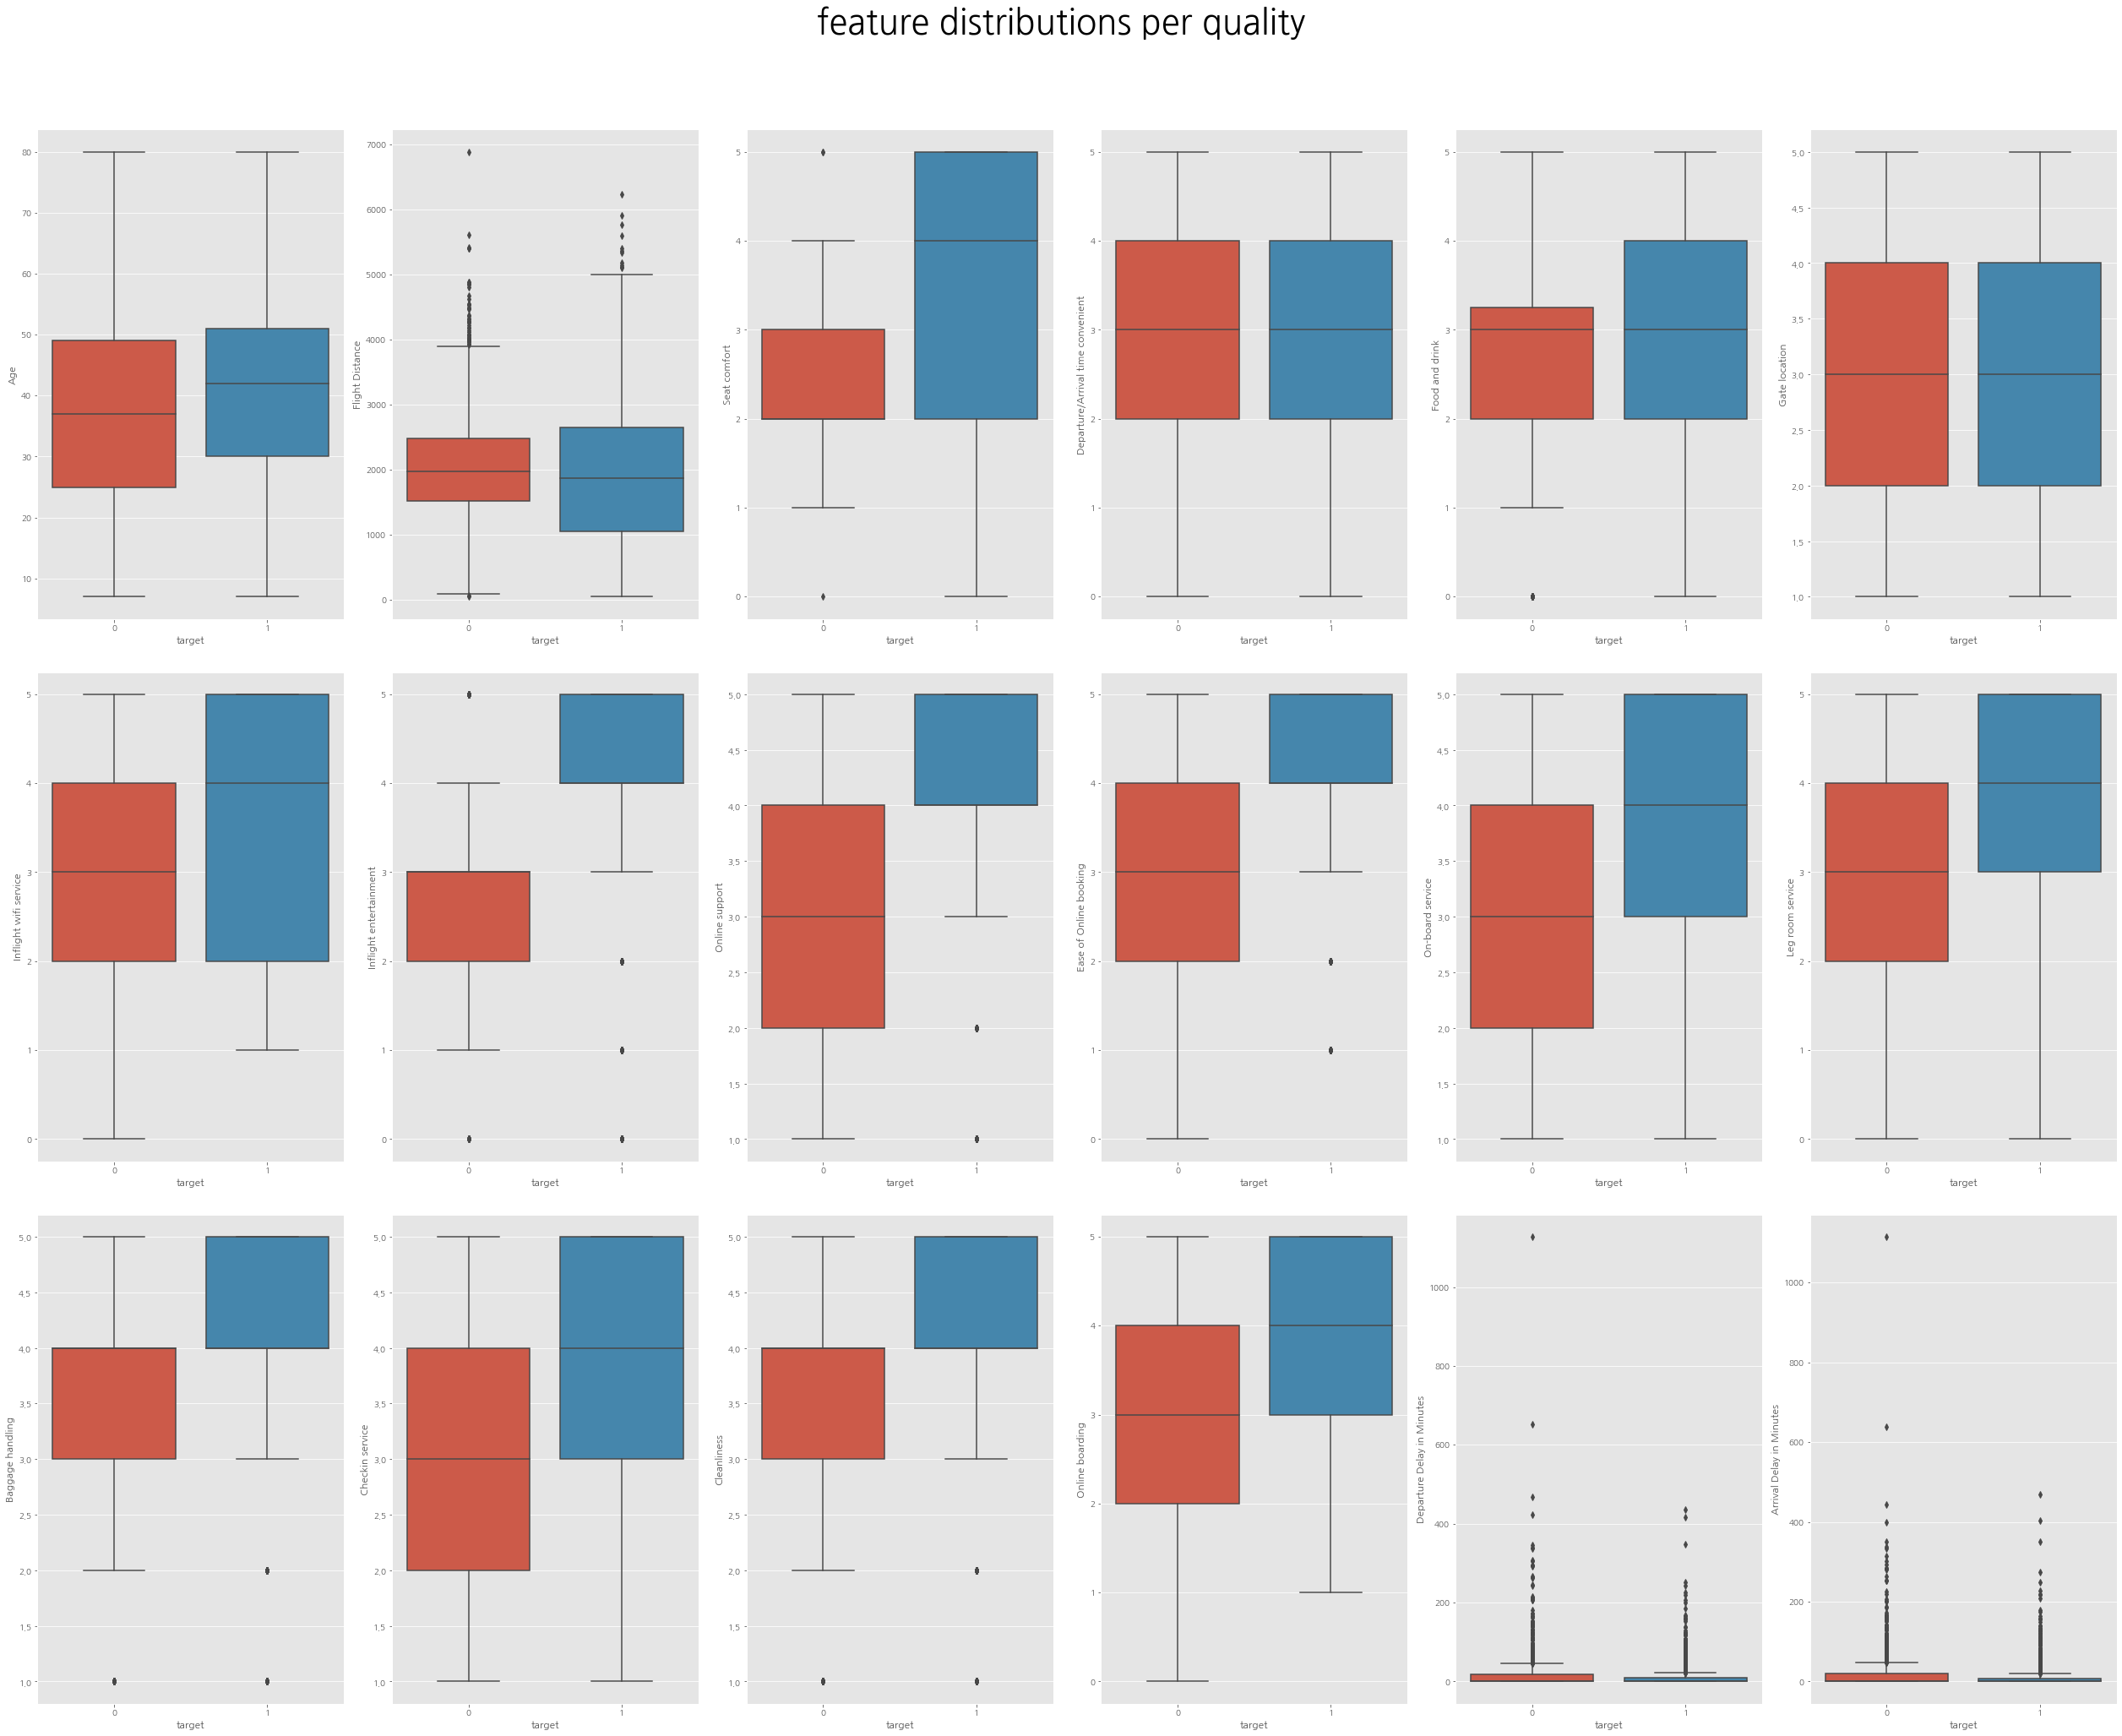

In [35]:
numeric_vs_target(train)

In [36]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

# 데이터 전처리

## 레벨형 변수들은 평균값으로 대체
## 범주형은 원핫인코딩
## 로그변환

In [40]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


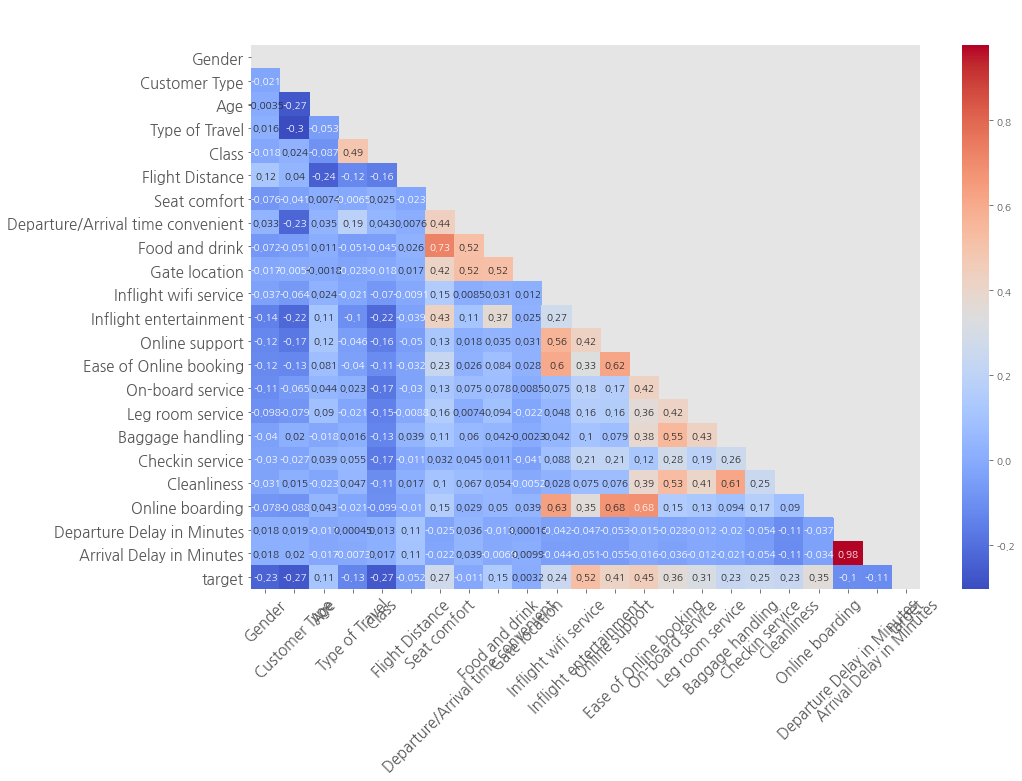

In [41]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [43]:
abs(corr_df.corr()["target"]).sort_values(ascending = False)[:10]

target                    1.000000
Inflight entertainment    0.522935
Ease of Online booking    0.447784
Online support            0.411944
On-board service          0.359699
Online boarding           0.351370
Leg room service          0.311086
Customer Type             0.271471
Seat comfort              0.271270
Class                     0.267565
Name: target, dtype: float64

In [67]:
train.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0


In [84]:
train_df = train.copy()
test_df = test.copy()

In [85]:
Gender_dict = train_df.groupby(["Gender"])["target"].mean().to_dict()
Customer_Type_dict = train_df.groupby(["Customer Type"])["target"].mean().to_dict()
Type_of_Travel_dict = train_df.groupby(["Type of Travel"])["target"].mean().to_dict()
Class_dict = train_df.groupby(["Class"])["target"].mean().to_dict()

In [86]:
train_df["Gender"] = train_df["Gender"].map(Gender_dict)
train_df["Customer Type"] = train_df["Customer Type"].map(Customer_Type_dict)
train_df["Type of Travel"] = train_df["Type of Travel"].map(Type_of_Travel_dict)
train_df["Class"] = train_df["Class"].map(Class_dict)

test_df["Gender"] = test_df["Gender"].map(Gender_dict)
test_df["Customer Type"] = test_df["Customer Type"].map(Customer_Type_dict)
test_df["Type of Travel"] = test_df["Type of Travel"].map(Type_of_Travel_dict)
test_df["Class"] = test_df["Class"].map(Class_dict)

In [ ]:
# Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 는 피처는 연속형 

# numeric_features = list(train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")])

# numeric_features.remove("Age")
# numeric_features.remove("Flight Distance")
# numeric_features.remove("Departure Delay in Minutes")
# numeric_features.remove("Arrival Delay in Minutes")

# levels_features = numeric_features
# numeric_features = list(train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")])

In [132]:
abs(train_df.corr()["target"]).sort_values(ascending = False)

target                               1.000000
Inflight entertainment               0.522935
Ease of Online booking               0.447784
Online support                       0.411944
On-board service                     0.359699
Online boarding                      0.351370
Leg room service                     0.311086
Class                                0.300909
Customer Type                        0.271471
Seat comfort                         0.271270
Checkin service                      0.248975
Inflight wifi service                0.242427
Cleanliness                          0.234848
Gender                               0.233619
Baggage handling                     0.232302
Food and drink                       0.145126
Type of Travel                       0.133565
Arrival Delay in Minutes             0.112338
Age                                  0.107226
Departure Delay in Minutes           0.104975
Flight Distance                      0.052059
Departure/Arrival time convenient 

In [133]:
# 상관계수 값 0.3 이상인 컬럼만 사용
(abs(train_df.corr()["target"]).sort_values(ascending = False) > 0.3)

target                                True
Inflight entertainment                True
Ease of Online booking                True
Online support                        True
On-board service                      True
Online boarding                       True
Leg room service                      True
Class                                 True
Customer Type                        False
Seat comfort                         False
Checkin service                      False
Inflight wifi service                False
Cleanliness                          False
Gender                               False
Baggage handling                     False
Food and drink                       False
Type of Travel                       False
Arrival Delay in Minutes             False
Age                                  False
Departure Delay in Minutes           False
Flight Distance                      False
Departure/Arrival time convenient    False
Gate location                        False
Name: targe

In [134]:
from sklearn.preprocessing import LabelEncoder

X_train = train_df.copy()
X_train = X_train.loc[:,(abs(train_df.corr()["target"]).sort_values(ascending = False) > 0.3)]
X_train = X_train.drop(columns=["target"], axis = 1)
#X_train[X_train.columns[X_train.dtypes=='O']] = X_train[X_train.columns[X_train.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

y_train = train_df.target


X_test = test_df.copy()
X_test = X_test.loc[:,(abs(train_df.corr()["target"]).sort_values(ascending = False) > 0.3)]
#X_test[X_test.columns[X_test.dtypes=='O']] = X_test[X_test.columns[X_test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)


In [136]:
X_train.shape

(3000, 7)

In [137]:
X_test.shape

(2000, 7)

# 모델링

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [139]:
lr = LogisticRegression()


In [140]:
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [141]:
submission["target"] = prediction
submission.to_csv("first_original.csv",index = False)

In [142]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)


X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


In [143]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

submission["target"] = prediction
submission.to_csv("first_ss.csv",index = False)